# 房贷还款计算器

用于对房贷还款计划做决策。对比还款前后总支付金额。同时对比将资金用于其他投资产生的收益情况。

投资有风险，决策须谨慎，投资收益的计算结果是假设无风险且收益率可保证在设置的最低水平，且可以至少持续到贷款结束的时间。

## 基础知识

### 机会成本

机会成本是指在做出某种选择后，次优选项所带来的损失。

### 复利

复利的计算方法是：

$$
F = P \times (1 + r)^n
$$

其中，$F$ 是最终金额，$P$ 是本金，$r$ 是利率，$n$ 是计息期数。如果 $r$ 是年利率，则期数$n$是计息年数。

## 结论说明

结论符合人的直觉。也就是你的投资收益能超过银行则不用考虑提前还款，否则应该提前还款。

除此之外还有一些有趣的结论。如果你没有把提前还款省下来的钱继续用于投资，你的投资收益只需要银行利息的一半左右，就可以补足未提前还款而多付的利息。

比如下面这个例子，银行利率 4%，你只需要把准备提前还款的钱放在 2.2% 的投资中，就可以获得444.46的利息，超过了提前还款省下来的433.33，从这个角度来说你可以不考虑提前还款。但是如果你提前还款且足够自律，把每月省下来的钱定投在 2.2% 的投资中，你最终将获得更多的收益（642.1）。

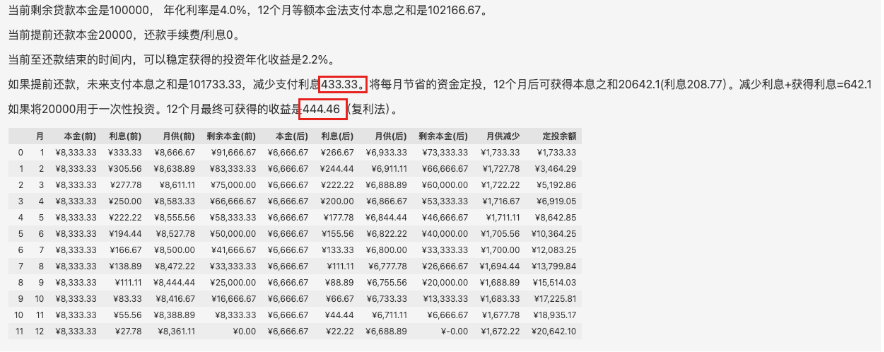




## 贷款信息设置

In [41]:
import pandas as pd
from IPython.display import Markdown


# 贷款剩余本金
principal_before = 100000
# 年利率
rate_year = 4/100
# 贷款剩余期数
term = 12

# 提前还款的本金
return_amount = 20000
# 提前还款支付的手续费、利息
return_intrest = 0

# 机会成本计算(年利率)
invest_intrest_year = 4/100


# 月利率计算
rate_month = rate_year/12
invest_intrest_month = invest_intrest_year/12

## 等额本金

In [42]:
decrease_before = principal_before / term
decrease_after = (principal_before - return_amount) / term
remain_before = principal_before
remain_after = principal_before - return_amount
payments_data = []

total_payments_before = (
    principal_before * rate_month + decrease_before * rate_month
) * term / 2 + principal_before

total_payments_after = (
    (remain_after * rate_month + decrease_after * rate_month) * term / 2
    + remain_after
    + return_amount
    + return_intrest
)

investment_balance = 0
total_reduced = 0
for i in range(term):
    interest_before = remain_before * rate_month
    remain_before = remain_before - decrease_before

    interest_after = remain_after * rate_month
    remain_after = remain_after - decrease_after
    
    reduce_monthly = decrease_before+interest_before-(decrease_after+interest_after)
    investment_balance = investment_balance  * (1+invest_intrest_month) + reduce_monthly
    total_reduced = total_reduced + reduce_monthly

    payments_data.append(
        {
            "月": i + 1,
            "本金(前)": decrease_before, 
            "利息(前)": interest_before, 
            "月供(前)": decrease_before + interest_before,
            "剩余本金(前)": remain_before,
            "本金(后)": decrease_after,
            "利息(后)": interest_after,
            "月供(后)": decrease_after + interest_after,
            "剩余本金(后)": remain_after,
            "月供减少": reduce_monthly,
            "定投余额": investment_balance,
        }
    )
display(
    Markdown(
        ('<p style="font-size: 16px">当前剩余贷款本金是{}， 年化利率是{}%，{}个月等额本金法支付本息之和是{}。</p>'
        +'<p style="font-size: 16px">当前提前还款本金{}，还款手续费/利息{}。</p>'
        +'<p style="font-size: 16px">当前至还款结束的时间内，可以稳定获得的投资年化收益是{}%。</p>'
        +'<p style="font-size: 16px">如果提前还款，未来支付本息之和是{}，减少支付利息{}。将每月节省的资金定投，{}个月后可获得本息之和{}(利息{}）。减少利息+获得利息={}</p>'
        +'<p style="font-size: 16px">如果将{}用于一次性投资。{}个月最终可获得的收益是{}（复利法）。</p> ').format(
            round(principal_before, 2),
            round(rate_year * 100, 2),
            term,
            round(total_payments_before, 2),
            
            round(return_amount, 2),
            round(return_intrest, 2),
            
            invest_intrest_year * 100,
            
            round(total_payments_after, 2),
            round(total_payments_before - total_payments_after, 2),
            term,
            round(investment_balance, 2),
            round(investment_balance - total_reduced, 2),
            round(total_payments_before - total_payments_after+(investment_balance - total_reduced),2),
            
            round(return_amount + return_intrest, 2),
            term,
            round(
                (return_amount + return_intrest) * (1 + invest_intrest_month) ** term
                - (return_amount + return_intrest),
                2,
            ),
        )
    )
)

df = pd.DataFrame(payments_data)
display(
    df.style.format(
        {
            "本金(前)": "¥{:,.2f}",
            "利息(前)": "¥{:,.2f}",
            "月供(前)": "¥{:,.2f}",
            "剩余本金(前)": "¥{:,.2f}",
            "本金(后)": "¥{:,.2f}",
            "利息(后)": "¥{:,.2f}",
            "月供(后)": "¥{:,.2f}",
            "剩余本金(后)": "¥{:,.2f}",
            "月供减少": "¥{:,.2f}",
            "定投余额": "¥{:,.2f}",
        }
    )
)

<p style="font-size: 16px">当前剩余贷款本金是100000， 年化利率是4.0%，12个月等额本金法支付本息之和是102166.67。</p><p style="font-size: 16px">当前提前还款本金20000，还款手续费/利息0。</p><p style="font-size: 16px">当前至还款结束的时间内，可以稳定获得的投资年化收益是4.0%。</p><p style="font-size: 16px">如果提前还款，未来支付本息之和是101733.33，减少支付利息433.33。将每月节省的资金定投，12个月后可获得本息之和20814.83(利息381.5）。减少利息+获得利息=814.83</p><p style="font-size: 16px">如果将20000用于一次性投资。12个月最终可获得的收益是814.83（复利法）。</p> 

,月,本金(前),利息(前),月供(前),剩余本金(前),本金(后),利息(后),月供(后),剩余本金(后),月供减少,定投余额
0,1,"¥8,333.33",¥333.33,"¥8,666.67","¥91,666.67","¥6,666.67",¥266.67,"¥6,933.33","¥73,333.33","¥1,733.33","¥1,733.33"
1,2,"¥8,333.33",¥305.56,"¥8,638.89","¥83,333.33","¥6,666.67",¥244.44,"¥6,911.11","¥66,666.67","¥1,727.78","¥3,466.89"
2,3,"¥8,333.33",¥277.78,"¥8,611.11","¥75,000.00","¥6,666.67",¥222.22,"¥6,888.89","¥60,000.00","¥1,722.22","¥5,200.67"
3,4,"¥8,333.33",¥250.00,"¥8,583.33","¥66,666.67","¥6,666.67",¥200.00,"¥6,866.67","¥53,333.33","¥1,716.67","¥6,934.67"
4,5,"¥8,333.33",¥222.22,"¥8,555.56","¥58,333.33","¥6,666.67",¥177.78,"¥6,844.44","¥46,666.67","¥1,711.11","¥8,668.90"
5,6,"¥8,333.33",¥194.44,"¥8,527.78","¥50,000.00","¥6,666.67",¥155.56,"¥6,822.22","¥40,000.00","¥1,705.56","¥10,403.35"
6,7,"¥8,333.33",¥166.67,"¥8,500.00","¥41,666.67","¥6,666.67",¥133.33,"¥6,800.00","¥33,333.33","¥1,700.00","¥12,138.03"
7,8,"¥8,333.33",¥138.89,"¥8,472.22","¥33,333.33","¥6,666.67",¥111.11,"¥6,777.78","¥26,666.67","¥1,694.44","¥13,872.93"
8,9,"¥8,333.33",¥111.11,"¥8,444.44","¥25,000.00","¥6,666.67",¥88.89,"¥6,755.56","¥20,000.00","¥1,688.89","¥15,608.06"
9,10,"¥8,333.33",¥83.33,"¥8,416.67","¥16,666.67","¥6,666.67",¥66.67,"¥6,733.33","¥13,333.33","¥1,683.33","¥17,343.42"


## 等额本息

In [43]:
monthly_before = (
    principal_before
    * rate_month * (1 + rate_month) ** term
    / ((1 + rate_month) ** term - 1)
)

monthly_after = (
    (principal_before - return_amount)
    * rate_month
    * (1 + rate_month) ** term
    / ((1 + rate_month) ** term - 1)
)

monthly_investment_final = (monthly_before-monthly_after) * ((1 + invest_intrest_month) ** term - 1) / invest_intrest_month

total_payments_before = monthly_before * term
total_payments_after = monthly_after * term + return_amount + return_intrest

display(
    Markdown(
        ('<p style="font-size: 16px">当前剩余贷款本金是{}， 年化利率是{}%，{}个月等额本息法支付本息之和是{}。</p>'
        +'<p style="font-size: 16px">当前提前还款本金{}，还款手续费（或利息）{}。</p>'
        +'<p style="font-size: 16px">当前至还款结束的时间内，可以稳定获得的投资年化收益是{}%。</p>'
        +'<p style="font-size: 16px">如果提前还款，未来支付本息之和是{}，减少支付利息{}。每月节省月供{}，将节省资金定投，{}个月后可获得本息之和{}(利息{})。减少利息+获得利息={}。</p>'
        +'<p style="font-size: 16px">如果将{}用于一次性投资。{}个月最终可获得的收益是{}（复利法）。</p> ').format(            
            round(principal_before, 2),
            round(rate_year * 100, 2),
            term,
            round(total_payments_before, 2),
            
            round(return_amount, 2),
            round(return_intrest, 2),
            
            round(invest_intrest_year * 100, 2),
            
            round(total_payments_after, 2),
            round(total_payments_before - total_payments_after, 2),
            round(monthly_before - monthly_after, 2),
            term,
            round(monthly_investment_final, 2),
            round(
                monthly_investment_final - (monthly_before - monthly_after) * term, 
                2,
            ),
            round(monthly_investment_final - (monthly_before - monthly_after) * term + total_payments_before - total_payments_after, 2),
            
            round(return_amount + return_intrest, 2),
            term,
            round(
                (return_amount + return_intrest) * (1 + invest_intrest_month) ** term
                - (return_amount + return_intrest),
                2,
            ),
        )
    )
)

remaining_before = principal_before
remaining_after = principal_before - return_amount
payments_data = []
investment_balance = 0
for month in range(term):
    interest_before = remaining_before * rate_month
    decrease_before = monthly_before - interest_before
    remaining_before -= decrease_before

    interest_after = remaining_after * rate_month
    decrease_after = monthly_after - interest_after
    remaining_after -= decrease_after

    reduce_monthly = decrease_before+interest_before-(decrease_after+interest_after)
    # investment_balance = (investment_balance + reduce_monthly)  * (1+invest_intrest_month) 
    investment_balance = investment_balance  * (1+invest_intrest_month) + reduce_monthly

    payments_data.append(
        {
            "月": month + 1,
            "利息(前)": interest_before,
            "本金(前)": decrease_before,
            "月供(前)": interest_before + decrease_before,
            "剩余本金(前)": remaining_before,
            "利息(后)": interest_after,
            "本金(后)": decrease_after,
            "月供(后)": interest_after + decrease_after,
            "剩余本金(后)": remaining_after,
            "月供减少": reduce_monthly,
            "定投余额": investment_balance,
        }
    )

df = pd.DataFrame(payments_data)
display(
    df.style.format(
        {
            "本金(前)": "¥{:,.2f}",
            "利息(前)": "¥{:,.2f}",
            "月供(前)": "¥{:,.2f}",
            "剩余本金(前)": "¥{:,.2f}",
            "本金(后)": "¥{:,.2f}",
            "利息(后)": "¥{:,.2f}",
            "月供(后)": "¥{:,.2f}",
            "剩余本金(后)": "¥{:,.2f}",
            "月供减少": "¥{:,.2f}",
            "定投余额": "¥{:,.2f}",
        }
    )
)

<p style="font-size: 16px">当前剩余贷款本金是100000， 年化利率是4.0%，12个月等额本息法支付本息之和是102179.89。</p><p style="font-size: 16px">当前提前还款本金20000，还款手续费（或利息）0。</p><p style="font-size: 16px">当前至还款结束的时间内，可以稳定获得的投资年化收益是4.0%。</p><p style="font-size: 16px">如果提前还款，未来支付本息之和是101743.91，减少支付利息435.98。每月节省月供1703.0，将节省资金定投，12个月后可获得本息之和20814.83(利息378.85)。减少利息+获得利息=814.83。</p><p style="font-size: 16px">如果将20000用于一次性投资。12个月最终可获得的收益是814.83（复利法）。</p> 

,月,利息(前),本金(前),月供(前),剩余本金(前),利息(后),本金(后),月供(后),剩余本金(后),月供减少,定投余额
0,1,¥333.33,"¥8,181.66","¥8,514.99","¥91,818.34",¥266.67,"¥6,545.33","¥6,811.99","¥73,454.67","¥1,703.00","¥1,703.00"
1,2,¥306.06,"¥8,208.93","¥8,514.99","¥83,609.41",¥244.85,"¥6,567.14","¥6,811.99","¥66,887.53","¥1,703.00","¥3,411.67"
2,3,¥278.70,"¥8,236.29","¥8,514.99","¥75,373.12",¥222.96,"¥6,589.03","¥6,811.99","¥60,298.50","¥1,703.00","¥5,126.04"
3,4,¥251.24,"¥8,263.75","¥8,514.99","¥67,109.37",¥200.99,"¥6,611.00","¥6,811.99","¥53,687.50","¥1,703.00","¥6,846.13"
4,5,¥223.70,"¥8,291.29","¥8,514.99","¥58,818.08",¥178.96,"¥6,633.03","¥6,811.99","¥47,054.47","¥1,703.00","¥8,571.95"
5,6,¥196.06,"¥8,318.93","¥8,514.99","¥50,499.15",¥156.85,"¥6,655.14","¥6,811.99","¥40,399.32","¥1,703.00","¥10,303.52"
6,7,¥168.33,"¥8,346.66","¥8,514.99","¥42,152.49",¥134.66,"¥6,677.33","¥6,811.99","¥33,721.99","¥1,703.00","¥12,040.86"
7,8,¥140.51,"¥8,374.48","¥8,514.99","¥33,778.01",¥112.41,"¥6,699.59","¥6,811.99","¥27,022.41","¥1,703.00","¥13,784.00"
8,9,¥112.59,"¥8,402.40","¥8,514.99","¥25,375.61",¥90.07,"¥6,721.92","¥6,811.99","¥20,300.49","¥1,703.00","¥15,532.94"
9,10,¥84.59,"¥8,430.41","¥8,514.99","¥16,945.21",¥67.67,"¥6,744.32","¥6,811.99","¥13,556.17","¥1,703.00","¥17,287.71"
